In [1]:
import pandas as pd
import numpy as np
from math import cos, sin

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

from matplotlib import pyplot as plt

In [83]:
'''
In 2D
The initial state has the form 
state[:,0] = mass
state[0,1:3], state[0,3:6] = p1 (px1, py1), v1 // position not momenta
state[1,1:3], state[1,3:6] = p2 (px2, py2), v2
state[2,1:3], state[2,3:6] = p3 (px3, py3), v3
'''


'''
def get_accelerations(state, epsilon=0):
    net_accs = [] # [nbodies x 2]
    for i in range(state.shape[0]): # number of bodies
        other_bodies = np.concatenate([state[:i, :], state[i+1:, :]], axis=0)
        displacements = other_bodies[:, 1:3] - state[i, 1:3] # indexes 1:3 -> pxs, pys
        distances = (displacements**2).sum(1, keepdims=True)**0.5 # shape=(2,1) consist of euclidian distances from particles j to particle i
        masses = other_bodies[:, 0:1] # index 0 -> mass
        pointwise_accs = masses * displacements / (distances**3 + epsilon) # G=1
        net_acc = pointwise_accs.sum(0, keepdims=True)
        net_accs.append(net_acc)
    net_accs = np.concatenate(net_accs, axis=0)
    return net_accs    


def update(t, state):
    state = state.reshape(-1,5)
    deriv = np.zeros_like(state)
    deriv[:,1:3] = state[:,3:5] # dx, dy = vx, vy for all bodies
    deriv[:,3:5] = get_accelerations(state)
    return derivs.reshape(-1)

nbodies = state.shape[0]
t_eval = np.linspace(t_span[0], t_span[1], t_points)
path = solve_ivp(fun=update, t_span=t_span, y0=state.flatten(), t_eval=t_eval, **kwargs)


'''

'\ndef get_accelerations(state, epsilon=0):\n    net_accs = [] # [nbodies x 2]\n    for i in range(state.shape[0]): # number of bodies\n        other_bodies = np.concatenate([state[:i, :], state[i+1:, :]], axis=0)\n        displacements = other_bodies[:, 1:3] - state[i, 1:3] # indexes 1:3 -> pxs, pys\n        distances = (displacements**2).sum(1, keepdims=True)**0.5 # shape=(2,1) consist of euclidian distances from particles j to particle i\n        masses = other_bodies[:, 0:1] # index 0 -> mass\n        pointwise_accs = masses * displacements / (distances**3 + epsilon) # G=1\n        net_acc = pointwise_accs.sum(0, keepdims=True)\n        net_accs.append(net_acc)\n    net_accs = np.concatenate(net_accs, axis=0)\n    return net_accs    \n\n\ndef update(t, state):\n    state = state.reshape(-1,5)\n    deriv = np.zeros_like(state)\n    deriv[:,1:3] = state[:,3:5] # dx, dy = vx, vy for all bodies\n    deriv[:,3:5] = get_accelerations(state)\n    return derivs.reshape(-1)\n\nnbodies = sta

# Second-order ODE:

y'' +2y' +2y = cos(2x)

## Turn into two first-order ODEs:

* z = y' -> dy/dx = z
* z' + 2z +2y = cos(2x) -> dz/dx = -2z - 2y + cos(2x)

In [88]:
def dUdx(U,x):
    # U is a vector such that U[0] = y, U[1] = z
    # dUdx returns [y',z'] = [dydx, dzdx]
    return [U[1], -2 * U[1] - 2 * U[0] + np.cos(2*x)]

def dUdx_inv2(x, U):
    return [U[1], -2.0 * U[1] - 2 * U[0] + np.cos(2*x)]

In [89]:
def dUdx_inv(x, U):
    return -2 * U[0] - 2 * U[1] + np.cos(2*x)

In [93]:
def rk4(func, U, t, h):
    
    k1 = func(t, U)
    k2 = func(t + h * 0.5, U + k1 * 0.5 * h)
    k3 = func(t + h * 0.5, U + k2 * 0.5 * h)
    k4 = func(t + h, U + k3 * h)
    
    v = U[1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    # v doesn't explicitly depend on other variables
    k1 = k2 = k3 = k4 = v
    
    u = U[0] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    print('[{},{}]'.format(u, v))
    return np.array([u, v])

In [94]:
def rk2(func, U, t, h):
    #print('--------- rk2 ---------')
    # update z
    k1 = func(t, U) 
    k2 = func(t + h, U + k1 * h)
    
    #print('k1: {}, k2: {}'.format(k1,k2))
    
    v = U[1] + 0.5 * (k1 + k2) * h    
    
    #print('v: {}'.format(v))
    
    # update y
    k1 = k2 = v
    
    #print('k1: {}, k2: {}'.format(k1,k2))
    
    y = U[0] + 0.5 * (k1 + k2) * h 
    print('[{},{}]'.format(y, v))
    return np.array([y,v])

In [97]:
U0 = np.array([0,0]) # [y0, z0]
# time intervall
t_eval = [0,10]
timepoints = 500
xs = np.linspace(t_eval[0], t_eval[1], timepoints)
h = (t_eval[1] - t_eval[0]) / (timepoints - 1)

# get solution from odeint
Us_odeint = odeint(dUdx, U0, xs)
sol_odeint = Us_odeint[:,0]

# get solution from solve_ivp
Us_solve_ivp = solve_ivp(dUdx_inv2, y0=U0, t_span=[xs[0], xs[-1]], t_eval=xs)
sol_ivp = Us_solve_ivp.y[0]

sol_rk2 = U0
rk2_list = []

sol_rk4 = U0
rk4_list = []


for t in xs:
    #print(sol_rk2)
    #sol_rk2 = rk2(dUdx_inv, sol_rk2, t, h)
    #rk2_list.append(sol_rk2[0])
    
    sol_rk4 = rk4(dUdx_inv, sol_rk4, t, h)
    rk4_list.append(sol_rk4[0])

[0.00038582450175676515,0.01925264263766258]
[0.001141691505565178,0.037717763490039816]
[0.002251522536300495,0.05538056843369231]
[0.0036989684685529026,0.07222755201939512]
[0.005467435556560686,0.08824650769158839]
[0.007540111636165816,0.10342653637229599]
[0.009899992465562035,0.11775805338687134]
[0.012529908171205167,0.13123279371159235]
[0.015412549764909175,0.14384381552582995]
[0.0185304956978601,0.1555855020542511]
[0.021866238417044135,0.16645356168728334]
[0.025402210889406043,0.1764450263708592]
[0.029120813058930488,0.1855582482592699]
[0.03300443820177187,0.1937928946277847]
[0.03703549914454802,0.20114994104453013]
[0.04119645431096016,0.20763166280396578]
[0.04546983356200503,0.21324162462713897]
[0.049838263795206235,0.2179846686367403]
[0.05428449426850914,0.22186690061781492]
[0.058791421614757707,0.22489567457780338]
[0.06334211451300192,0.22707957562238631]
[0.06791983798327018,0.22842840116638627]
[0.07250807727188201,0.22895314050173024]
[0.0770905612948719,0.

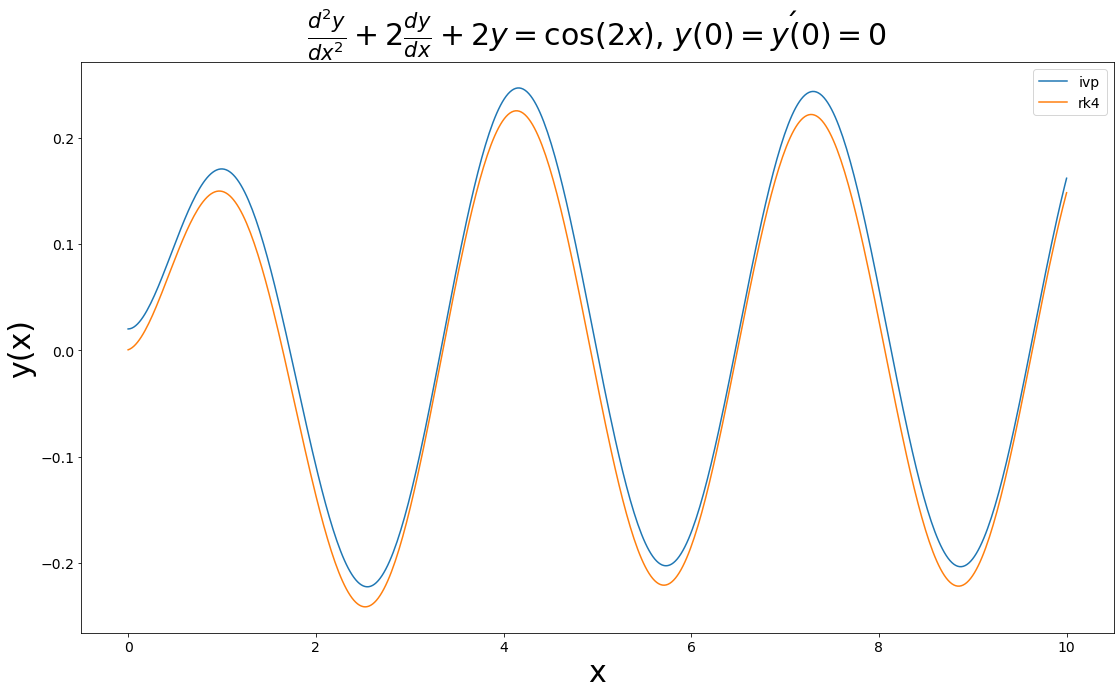

In [98]:
# Plot the numerical solution
# plot results
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.rcParams.update({'font.size': 14})  # increase the font size

#plt.plot(xs, sol_odeint, label='odeint')
plt.plot(xs, [x + 0.02 for x in sol_ivp], label='ivp')
#plt.plot(xs, rk2_list, label='rk2')
plt.plot(xs, rk4_list, label='rk4')

plt.title(r'$\frac{d^2y}{dx^2} + 2\frac{dy}{dx} + 2y = \cos(2x)$, $y(0)=y\'(0)=0$', fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y(x)', fontsize=30)
plt.legend(loc='best', fontsize=20)


plt.legend(loc='best')